In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('BAJAJFINSV.csv')

df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2008-05-26,BAJAJFINSV,EQ,2101.05,600.00,619.00,501.0,505.1,509.10,548.85,3145446,1.726368e+14,NaN,908264,0.2888
1,2008-05-27,BAJAJFINSV,EQ,509.10,505.00,610.95,491.1,564.0,554.65,572.15,4349144,2.488370e+14,NaN,677627,0.1558
2,2008-05-28,BAJAJFINSV,EQ,554.65,564.00,665.60,564.0,643.0,640.95,618.37,4588759,2.837530e+14,NaN,774895,0.1689
3,2008-05-29,BAJAJFINSV,EQ,640.95,656.65,703.00,608.0,634.5,632.40,659.60,4522302,2.982921e+14,NaN,1006161,0.2225
4,2008-05-30,BAJAJFINSV,EQ,632.40,642.40,668.00,588.3,647.0,644.00,636.41,3057669,1.945929e+14,NaN,462832,0.1514


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3201 non-null   object 
 1   Symbol              3201 non-null   object 
 2   Series              3201 non-null   object 
 3   Prev Close          3201 non-null   float64
 4   Open                3201 non-null   float64
 5   High                3201 non-null   float64
 6   Low                 3201 non-null   float64
 7   Last                3201 non-null   float64
 8   Close               3201 non-null   float64
 9   VWAP                3201 non-null   float64
 10  Volume              3201 non-null   int64  
 11  Turnover            3201 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3201 non-null   int64  
 14  %Deliverble         3201 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 375.2

In [4]:
df.shape

(3201, 15)

In [5]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3201.000000,3.201000e+03,3.201000e+03,2456.000000,3.201000e+03,3201.000000
mean,2755.864386,2760.382381,2803.614449,2716.731443,2758.781537,2758.657451,2761.156954,2.315312e+05,9.533424e+13,20892.811075,7.409510e+04,0.471614
std,2869.811765,2874.814173,2912.885262,2834.037357,2873.792614,2873.522615,2874.033545,4.402681e+05,2.176448e+14,32396.302068,1.464012e+05,0.218910
min,90.750000,88.150000,93.100000,88.150000,91.000000,90.750000,89.260000,4.570000e+02,1.376712e+10,149.000000,4.560000e+02,0.056200
25%,527.900000,528.600000,542.600000,520.000000,527.950000,527.900000,531.270000,3.981100e+04,2.751053e+12,2951.750000,2.086300e+04,0.287400
50%,1098.700000,1095.000000,1118.000000,1080.250000,1100.000000,1098.700000,1103.560000,9.995300e+04,1.090486e+13,9450.000000,4.159700e+04,0.469700
75%,5121.900000,5120.000000,5199.800000,5042.800000,5115.000000,5125.100000,5127.510000,2.315400e+05,8.755946e+13,24439.750000,8.308900e+04,0.636000
max,11176.550000,11000.000000,11300.000000,10868.700000,11175.450000,11176.550000,11081.780000,6.271671e+06,3.394379e+15,312959.000000,3.804696e+06,1.000000


In [6]:
df.isnull().sum()

Date                    0
Symbol                  0
Series                  0
Prev Close              0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
VWAP                    0
Volume                  0
Turnover                0
Trades                745
Deliverable Volume      0
%Deliverble             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
print("\nDate range:", df['Date'].min(), "to", df['Date'].max())


Date range: 2008-05-26 to 2021-04-30


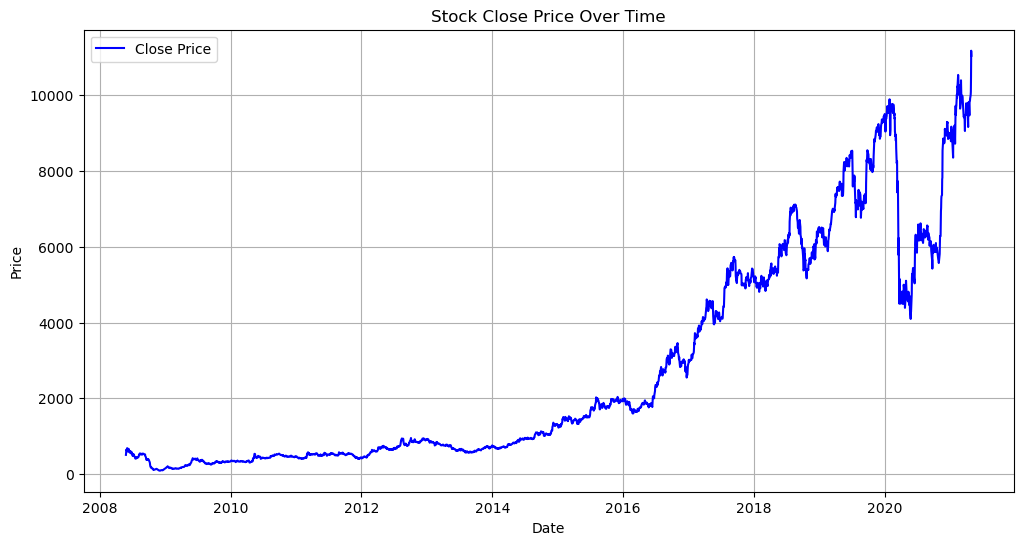

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

df.set_index('Date',inplace=True)
ts = df['Close']

In [11]:
rolling_mean = ts.rolling(window = 30).mean()
rolling_std = ts.rolling(window=30).std()

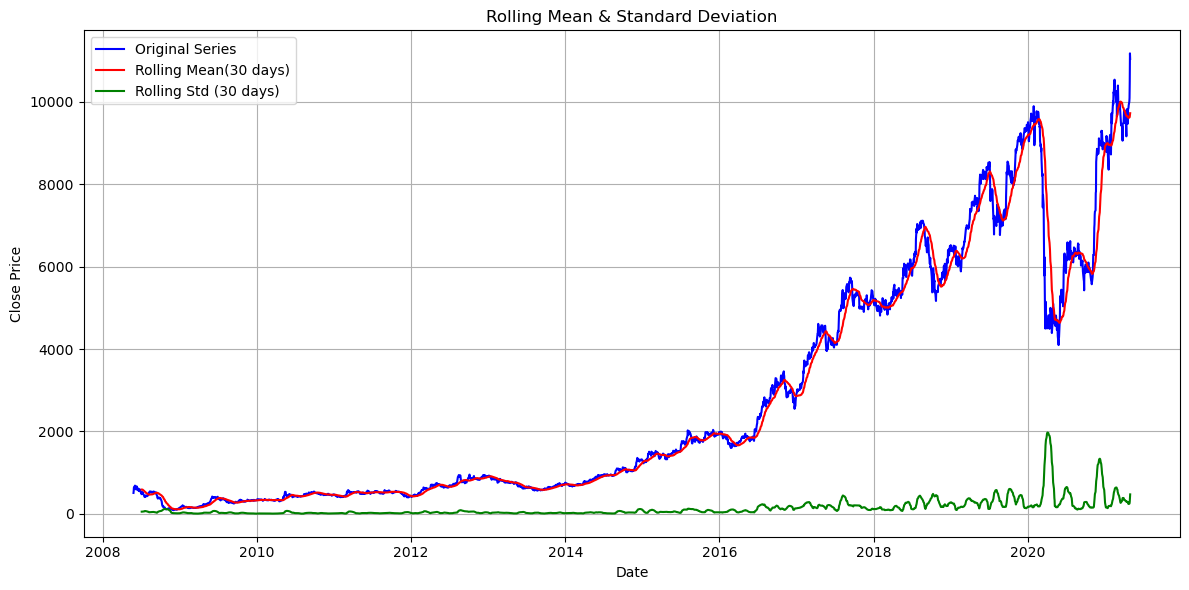

In [12]:
plt.figure(figsize=(12,6))
plt.plot(ts,label = 'Original Series',color = 'blue')
plt.plot(rolling_mean,label = 'Rolling Mean(30 days)',color ='red')
plt.plot(rolling_std, label='Rolling Std (30 days)', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
adf_result = adfuller(ts.dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
print("Critical Values:")
for key, value in adf_result[4].items():
    print(f"   {key}: {value}")

ADF Test Results:
ADF Statistic: 0.5653524010639519
p-value: 0.9867297500676576
Critical Values:
   1%: -3.4324099910200605
   5%: -2.8624501783666307
   10%: -2.5672545087086727


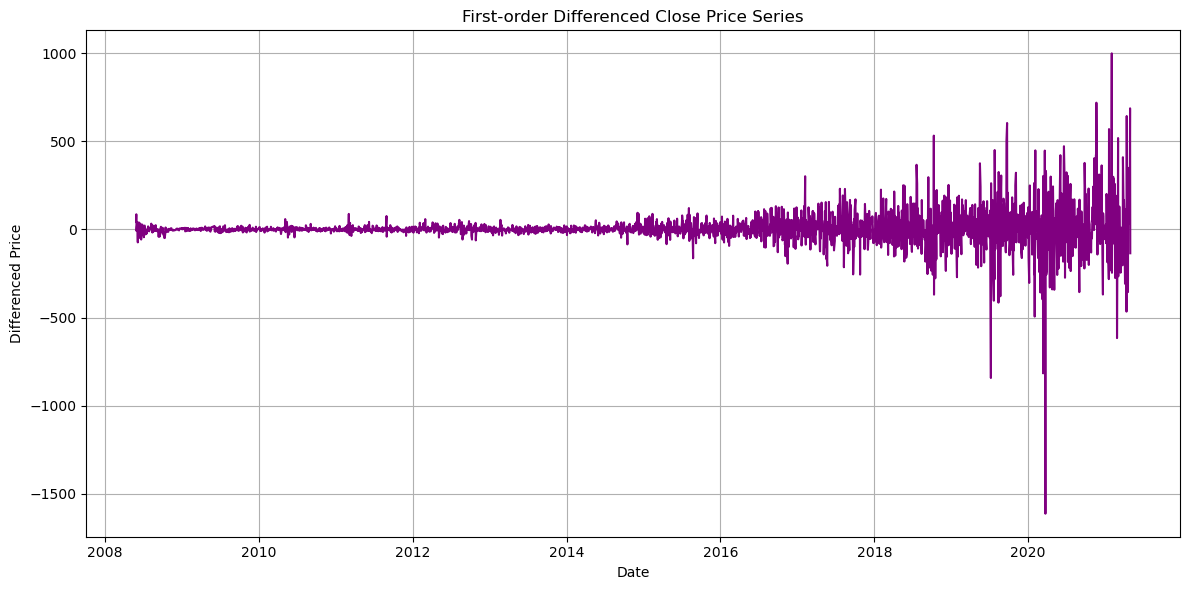

In [14]:
ts_diff = ts.diff().dropna()
plt.figure(figsize=(12,6))
plt.plot(ts_diff, color='purple')
plt.title('First-order Differenced Close Price Series')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
adf_diff_result = adfuller(ts_diff)
print("ADF Test Results (After First Differencing):")
print(f"ADF Statistic: {adf_diff_result[0]}")
print(f"p-value: {adf_diff_result[1]}")
print("Critical Values:")
for key, value in adf_diff_result[4].items():
    print(f"   {key}: {value}")

ADF Test Results (After First Differencing):
ADF Statistic: -10.779992095856027
p-value: 2.268060892314719e-19
Critical Values:
   1%: -3.4324099910200605
   5%: -2.8624501783666307
   10%: -2.5672545087086727


In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

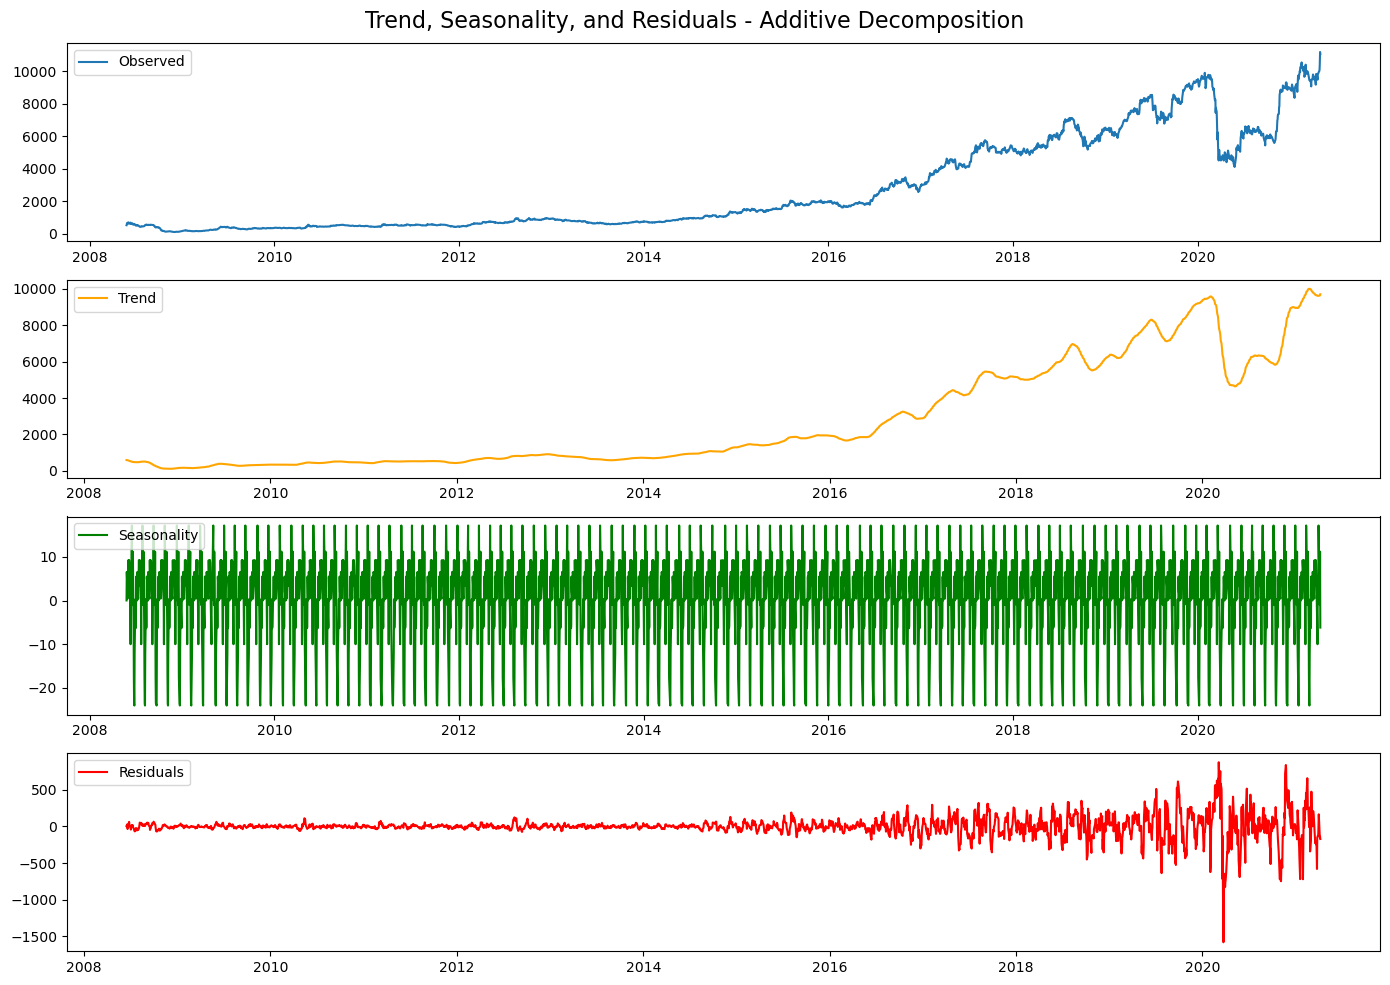

In [17]:
# --- Trend and Seasonality Decomposition ---
decomposition = seasonal_decompose(ts, model='additive', period=30)

plt.figure(figsize=(14,10))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observed')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals', color='red')
plt.legend(loc='upper left')
plt.suptitle('Trend, Seasonality, and Residuals - Additive Decomposition', fontsize=16)
plt.tight_layout()
plt.show()

# Time Series Decomposition Analysis

The charts display an additive decomposition of a time series from 2008 to 2020, breaking it down into its fundamental components:

1. **Observed Data (Blue, Top Chart)**
   This is the original time series showing the raw data values over time. The values range from near 0 to about 10,000. There's a clear upward trend over the years, with a significant increase starting around 2016. There appears to be a notable drop around early 2020 (likely related to the COVID-19 pandemic) followed by a recovery.

2. **Trend Component (Yellow, Second Chart)**
   This isolates the long-term progression of the series after removing seasonality and noise. The trend shows a steady, gradual increase from 2008 to 2014, followed by a more pronounced upward trajectory from 2015 to 2018. Around 2020, there's a significant dip (matching the observed data) followed by a recovery to previous levels.

3. **Seasonality Component (Green, Third Chart)**
   This shows the regular, periodic fluctuations in the data. The consistent pattern of peaks and valleys indicates a regular seasonal cycle that repeats throughout the entire time period. The amplitude of these seasonal variations appears relatively stable, generally ranging between -20 and +10 units.

4. **Residuals (Red, Bottom Chart)**
   These represent the irregular or random variations in the data after removing trend and seasonality. Residuals should ideally look like random noise without patterns. In this case, the residuals appear relatively small and random until around 2016-2017, when they become larger and more volatile. This suggests that the variability in the data increased in later years, with a particularly large negative spike visible around 2020.

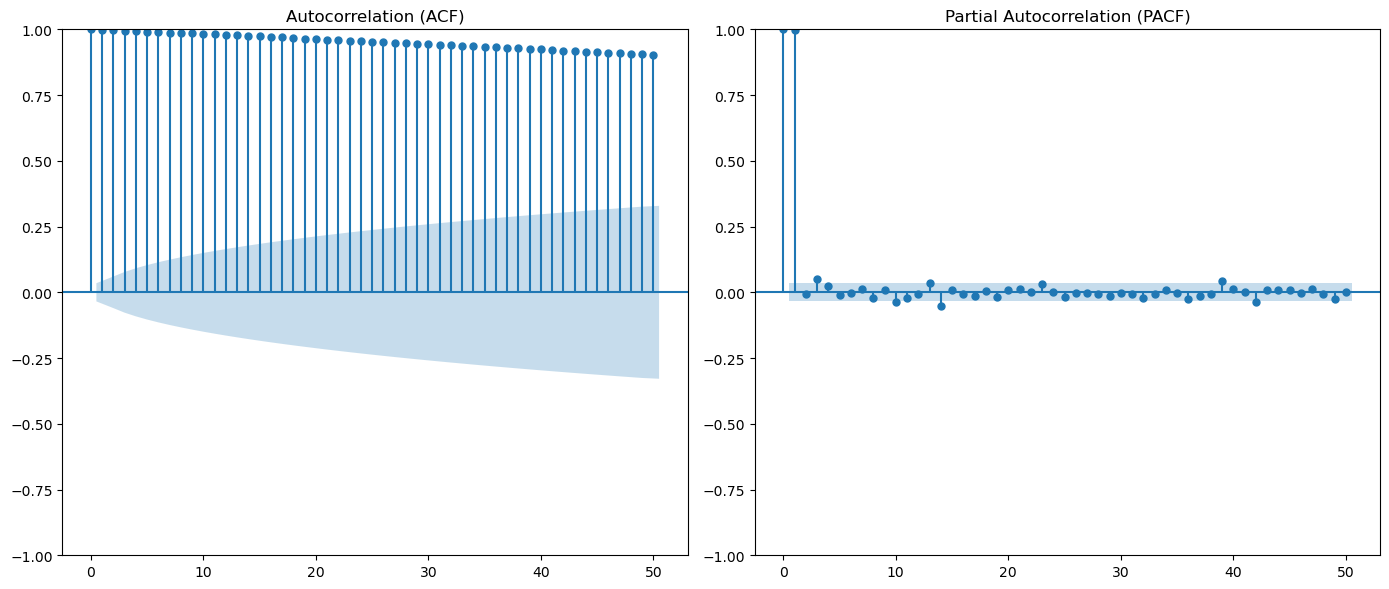

In [18]:
# --- Autocorrelation and Partial Autocorrelation ---
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plot_acf(ts.dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation (ACF)')

plt.subplot(1, 2, 2)
plot_pacf(ts.dropna(), lags=50, ax=plt.gca(), method='ywm')
plt.title('Partial Autocorrelation (PACF)')

plt.tight_layout()
plt.show()

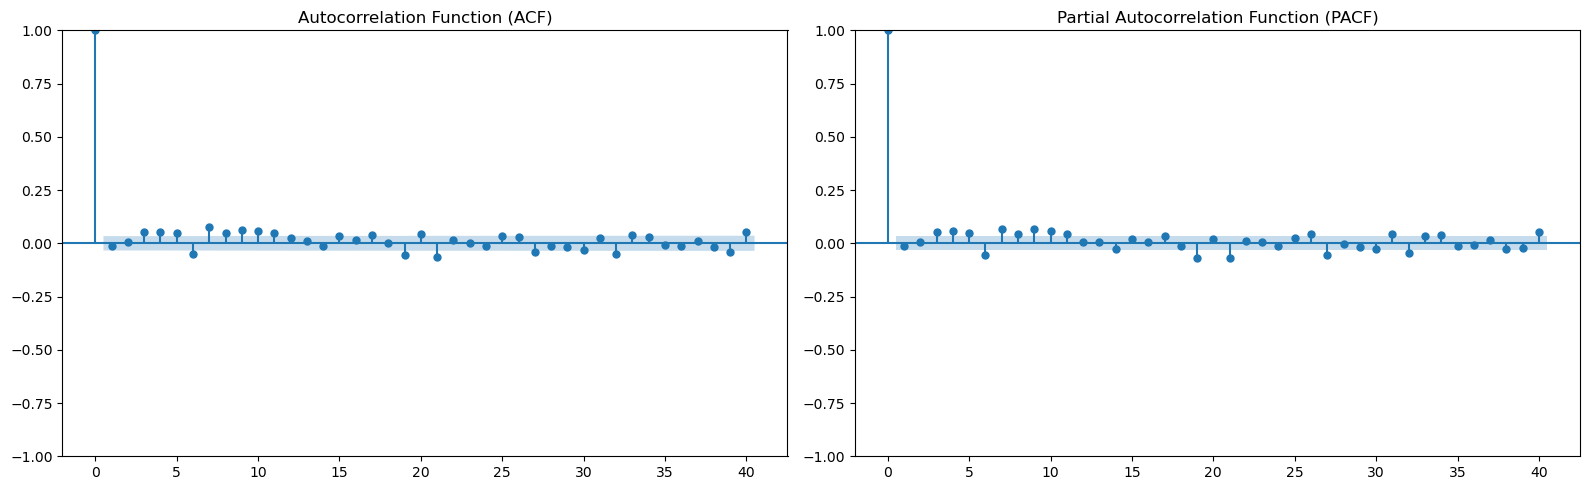

In [19]:
# Only convert and set index if 'Date' is still a column
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)

# Extract Close price and handle missing values
ts = df['Close'].asfreq('B').fillna(method='ffill')

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
plot_acf(ts.diff().dropna(), ax=axes[0], lags=40)
plot_pacf(ts.diff().dropna(), ax=axes[1], lags=40)
axes[0].set_title('Autocorrelation Function (ACF)')
axes[1].set_title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [20]:
from statsmodels.tsa.arima.model import ARIMA

In [21]:
model = ARIMA(ts, order = (2,1,2))
model_fit = model.fit()

C:\Users\user\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 3375
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -19946.132
Date:                Tue, 13 May 2025   AIC                          39902.263
Time:                        17:12:36   BIC                          39932.882
Sample:                    05-26-2008   HQIC                         39913.211
                         - 04-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8605      0.012    158.079      0.000       1.837       1.884
ar.L2         -0.9099      0.012    -76.499      0.000      -0.933      -0.887
ma.L1         -1.8812      0.010   -192.258      0.0

## ARIMA Model Results

The fitted ARIMA model shows:

* **AR(1) & AR(2)** terms (`ar.L1`, `ar.L2`) and
* **MA(1) & MA(2)** terms (`ma.L1`, `ma.L2`) are all statistically significant (*p-values < 0.05*).
* **AIC = 39902.161** and **BIC = 39932.781**: These metrics are used for model comparison (lower is better).
* `sigma2` is the estimated variance of the residuals.
* **Warning:** *ConvergenceWarning* suggests the model took longer to fit or had difficulty converging — not unusual for complex ARIMA models, but something to watch if model diagnostics perform poorly.

In [23]:
forecast_step = 30
forecast = model_fit.get_forecast(steps = forecast_step)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

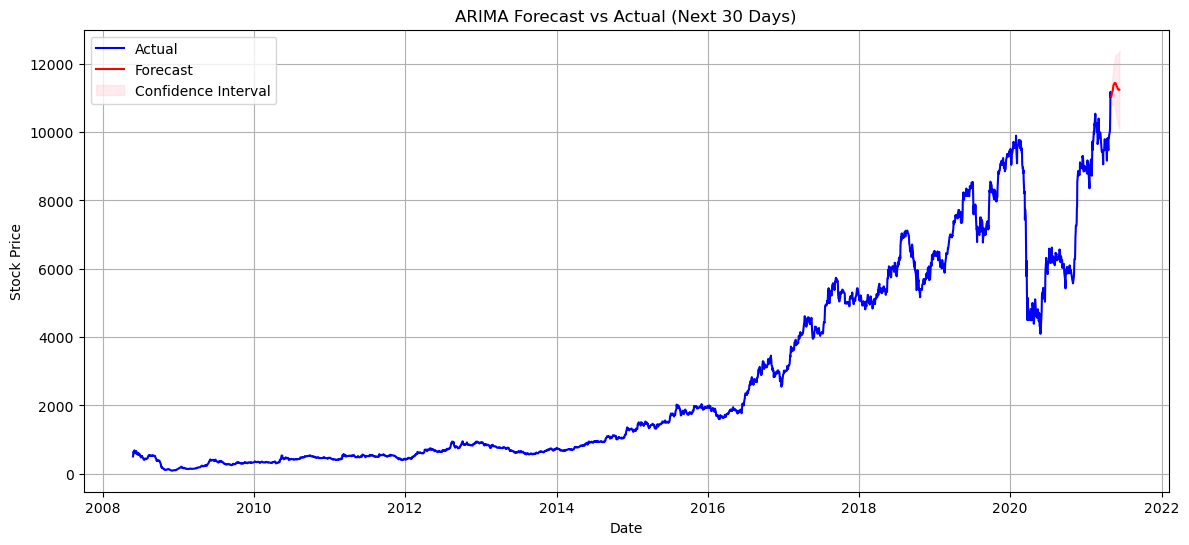

In [24]:
plt.figure(figsize=(14, 6))
plt.plot(ts, label='Actual', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_mean.index, 
                 conf_int.iloc[:, 0], 
                 conf_int.iloc[:, 1], 
                 color='pink', alpha=0.3, label='Confidence Interval')

plt.title('ARIMA Forecast vs Actual (Next 30 Days)')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

## Stock Price Forecast Analysis

* **Upward Trend (2008–2021):**
  * The stock price shows long-term **growth**, with some volatility — especially around 2020 (likely due to COVID-19 crash and rebound).
* **Forecast Segment:**
  * The forecast (red) starts where the actual data ends (~late 2021).
  * It **continues the upward trend**, reflecting what the ARIMA model "learned" from past data.
* **Confidence Interval:**
  * The pink shaded area grows wider — this is common in time series forecasting.
  * It shows that the model becomes **less certain** the further it predicts into the future.

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [26]:
pred = model_fit.predict(start =1,end = len(ts)-1,typ = 'levels')
actual = ts[1:]
rmse = np.sqrt(mean_squared_error(actual, pred))
mae = mean_absolute_error(actual, pred)
mape = np.mean(np.abs((actual - pred) / actual)) * 100

print(f"RMSE: {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

RMSE: 89.36
MAE : 41.72
MAPE: 1.66%


## Forecast Accuracy Metrics

| Metric | Value | Interpretation |
|--------|-------|---------------|
| **RMSE** | `89.36` | On average, the prediction deviates from the actual value by ~89 units. Lower is better. |
| **MAE** | `41.72` | The average **absolute** difference between predicted and actual prices. Very useful and interpretable. |
| **MAPE** | `1.66%` | The average prediction error is only about **1.66%** of the actual value — this is **very accurate** for a stock model. |

In [27]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [28]:
close_data = df[['Close']].values

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_data)

In [35]:
def create_sequences(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i - time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

X_train, y_train = create_sequences(train_data)
X_test, y_test = create_sequences(test_data)

In [36]:
time_steps = 60
total_points = len(scaled_data)

In [37]:
if total_points <= time_steps + 10:
    raise ValueError("Dataset too small to create sequences for LSTM. Add more data.")

In [38]:
train_size = total_points - time_steps
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size - time_steps:]

In [40]:
if X_test.size > 0:
    X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
    X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    print("Shapes after reshape:")
    print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
    print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")
else:
    raise ValueError("X_test is empty after sequence creation. Cannot proceed to training.")

Shapes after reshape:
X_train: (3081, 60, 1), y_train: (3081,)
X_test: (60, 60, 1), y_test: (60,)


In [41]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))

In [42]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [43]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0206 - val_loss: 0.0027
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 3.7586e-04 - val_loss: 0.0022
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 3.8330e-04 - val_loss: 0.0014
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.7329e-04 - val_loss: 0.0014
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.5317e-04 - val_loss: 0.0011
Epoch 6/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 2.7446e-04 - val_loss: 0.0011
Epoch 7/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 2.1905e-04 - val_loss: 0.0016
Epoch 8/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.3466e-04 - val_loss: 0.0017
Epoch 9/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 2.1695e-04 - val_loss: 0.0016
Epoch 10/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 1.9099e-04 - val_loss: 0.0017
Epoch 11/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.4357e-04 - val_loss: 8.5852e-04
Epoch 12/20
97/97 ━

In [45]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

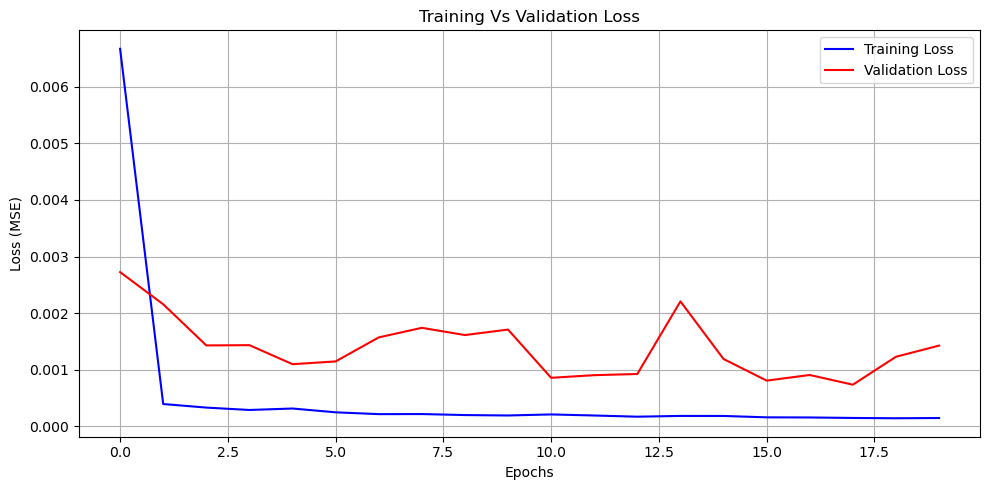

In [48]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'],label ='Training Loss',color = 'blue')
plt.plot(history.history['val_loss'],label ='Validation Loss',color = 'red')
plt.title("Training Vs Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
y_pred_scaled = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 374ms/step


In [50]:
y_pred = scaler.inverse_transform(y_pred_scaled)
y_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

In [51]:
rmse = np.sqrt(mean_squared_error(y_actual,y_pred))
mae = mean_absolute_error(y_actual,y_pred)
mape = np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

In [54]:
print(f"Evaluation Metrics:")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape:.2f}%")

Evaluation Metrics:
RMSE: 418.81
MAE: 337.63
MAPE: 3.38%


## Stock Price Model Performance Metrics

| Metric | Value | Interpretation |
|--------|-------|---------------|
| **RMSE** | 418.81 | On average, predictions deviate by ~₹418 from actual values. RMSE penalizes large errors. |
| **MAE** | 337.63 | Average absolute error is ~₹337.63 — this is a direct indication of deviation. |
| **MAPE** | 3.38% | Your model is, on average, **96.6% accurate** in predicting stock price! This is very good. |

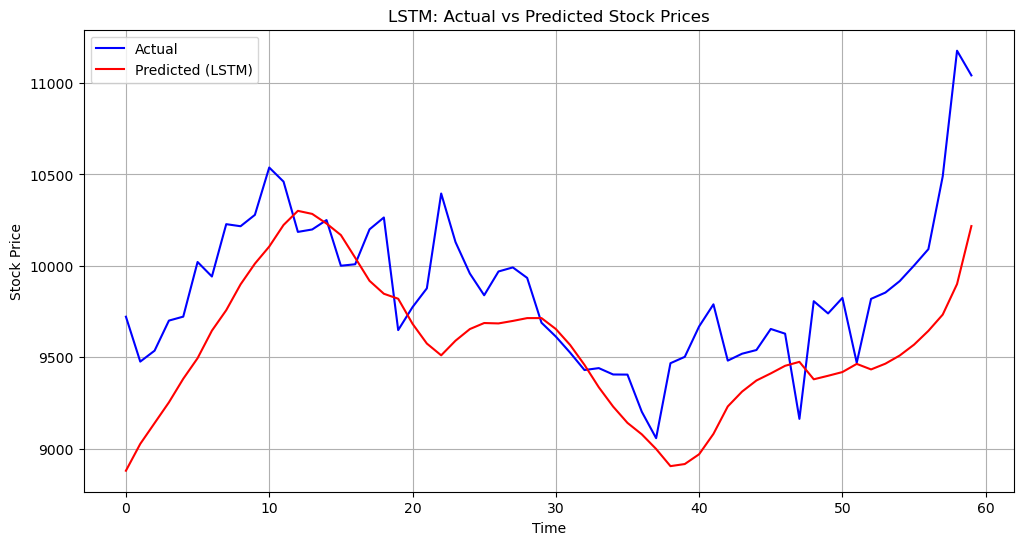

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(y_actual, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted (LSTM)', color='red')
plt.title('LSTM: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()